In [1]:
from datasets import load_dataset

ds = load_dataset("dair-ai/emotion", "unsplit")
print(ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 416809
    })
})


In [3]:
import pandas as pd
df_train = pd.DataFrame(ds['train'])
df_train.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


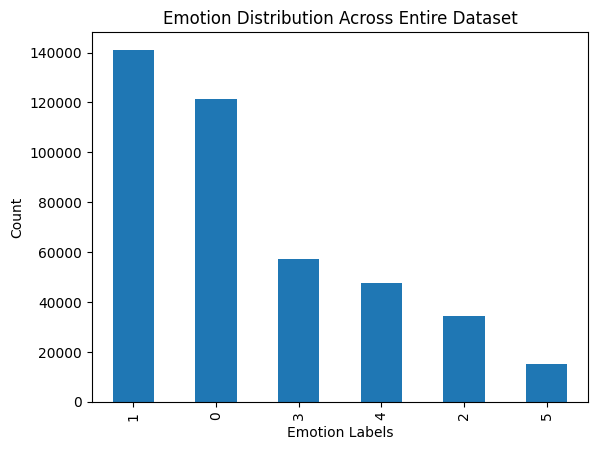

In [4]:
import matplotlib.pyplot as plt

# Plot emotion distribution across all data
df_train['label'].value_counts().plot(kind='bar')

# Add titles and labels
plt.title('Emotion Distribution Across Entire Dataset')
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.show()

In [5]:
print(df_train['label'].value_counts())

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64


In [7]:
samples_per_label = 14959

# Undersampling the dataset to balance the classes
balanced_df = (
    df_train.groupby('label')        
    .apply(lambda x: x.sample(n=samples_per_label, random_state=42))  # Randomly sampling per group
    .reset_index(drop=True) 
)

# Save the balanced dataset to a new CSV file
balanced_df.to_csv('balanced_dataset.csv', index=False)

print("Dataset has been balanced and saved as 'balanced_dataset.csv'")

Dataset has been balanced and saved as 'balanced_dataset.csv'


/var/folders/qz/3374k0z123qd44rjjjhkmxnr0000gn/T/ipykernel_42741/1072513722.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=samples_per_label, random_state=42))  # Randomly sampling per group


In [8]:
df = pd.read_csv('balanced_dataset.csv')
df.head()

,text,label
0,i feel sorry about you because your point of v...,0
1,i feel like he s watching quietly because he s...,0
2,i feel im ugly ugly ugly and ugly now,0
3,i remember my shower and the drawn out manner ...,0
4,i feel unwelcome when we can t go inside right...,0


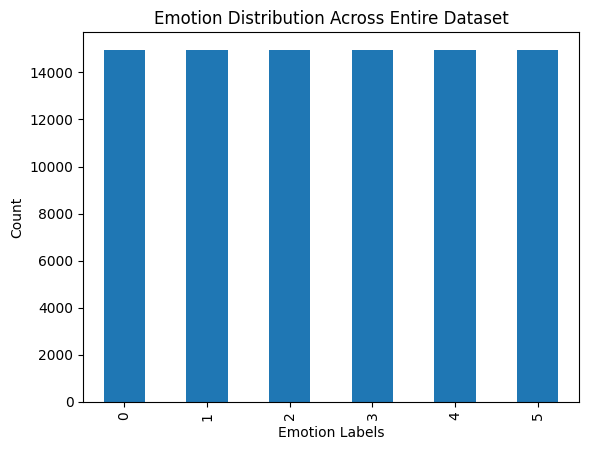

In [9]:
df['label'].value_counts().plot(kind='bar')

plt.title('Emotion Distribution Across Entire Dataset')
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.show()